In [21]:
import os

In [23]:
folder_path = '/Users/ilia/ATAT/home/tsha/NPlus1/texts'

texts = []
for count, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.txt'):  # Обрабатываем только текстовые файлы
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:  # Убедитесь, что используется правильная кодировка
            content = file.read()
            texts.append(content)  # Добавляем содержимое файла в список
            
    # Прерываем цикл, если считали 100 файлов
    if count >= 99:  # Считаем от 0 до 99, что дает 100 файлов
        break

In [25]:
for i in range(0, len(texts)):
    texts[i] = texts[i].lower()
    print(texts[i])


компания microsoft показала новый планшетный компьютер surface pro 4 и гибридный ноутбук surface book. устройства были представлены в рамках презентации продуктов компании в нью-йорке, подробнее можно прочитать на сайте компании.четвертое поколение планшета surface pro работает под управлением процессоров intel skylake, в зависимости от модификации в компьютер будет устанавливаться от 4 до 16 гигабайт оперативной памяти и ssd от 128 гигабайт до одного терабайта. предзаказ на устройство откроется 7 октября, в продажу surface pro 4 поступит 26 октября по цене от 899 долларов сша.также компания представила гибридный ноутбук surface book, экран с диагональю 13,5 дюймов отстегивается в полноценный планшет. внутри surface book будет устанавливаться процессор intel core i5 или i7 поколения skylake. оперативная память устройства в зависимости от модификации будет 8 или 16 гигабайт, ssd от 128 гигабайт до одного терабайта.несмотря на то, что подобная компоновка не является принципиально новой,

In [28]:
from sentence_transformers import SentenceTransformer

# Загружаем русскоязычную модель
embedding_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Создаем эмбеддинги для списка texts
embeddings = embedding_model.encode(
    texts, 
    batch_size=32, 
    show_progress_bar=False, 
    convert_to_numpy=True
)

# Проверка результата
print(f"Получена матрица размером: {embeddings.shape}")

Получена матрица размером: (100, 384)


In [5]:
!Pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00


In [40]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
# Укажите русскоязычную модель (например, rubert)
embedding_model = SentenceTransformer('cointegrated/rubert-tiny2')

topic_model = BERTopic(
    embedding_model=embedding_model,
    language='russian',  # Указываем язык
    nr_topics="auto",
    calculate_probabilities=True
)

topics, probabilities = topic_model.fit_transform(texts, embeddings)
print(topics, '\n', probabilities)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] 
 [[1.32393003e-001 6.32220592e-001]
 [1.00000000e+000 2.00125869e-309]
 [1.00000000e+000 2.13349158e-309]
 [2.12884409e-309 1.00000000e+000]
 [1.56379990e-001 5.35103172e-001]
 [2.13392939e-001 5.00337892e-001]
 [6.92010963e-002 7.82400828e-001]
 [1.72858149e-001 7.30865073e-001]
 [8.84718585e-001 1.15281415e-001]
 [6.47335657e-001 1.73570826e-001]
 [1.08012706e-001 8.54466330e-001]
 [1.00000000e+000 1.69615364e-309]
 [6.06902980e-001 1.79118960e-001]
 [2.18843650e-001 5.80826765e-001]
 [8.51378030e-001 1.48621970e-001]
 [7.79736716e-001 1.95096650e-001]
 [1.14680104e-001 7.59079489e-001]
 [8.80261983e-001 1.19738017e-001]
 [9.32979971e-002 7.79844211e-001]
 [1.00000000e+000 2.04337876e-30

In [50]:
!pip install hdbscan

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [52]:
import hdbscan

# Применяем HDBSCAN к эмбеддингам
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,   # Минимальный размер кластера
    min_samples=2,        # Минимальная плотность
    metric='euclidean'    # Метрика расстояния
)
labels = clusterer.fit_predict(embeddings)  # Создаем labels

# Проверка
print(f"Кластеров: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Шумовых точек: {sum(labels == -1)}")

Кластеров: 3
Шумовых точек: 57


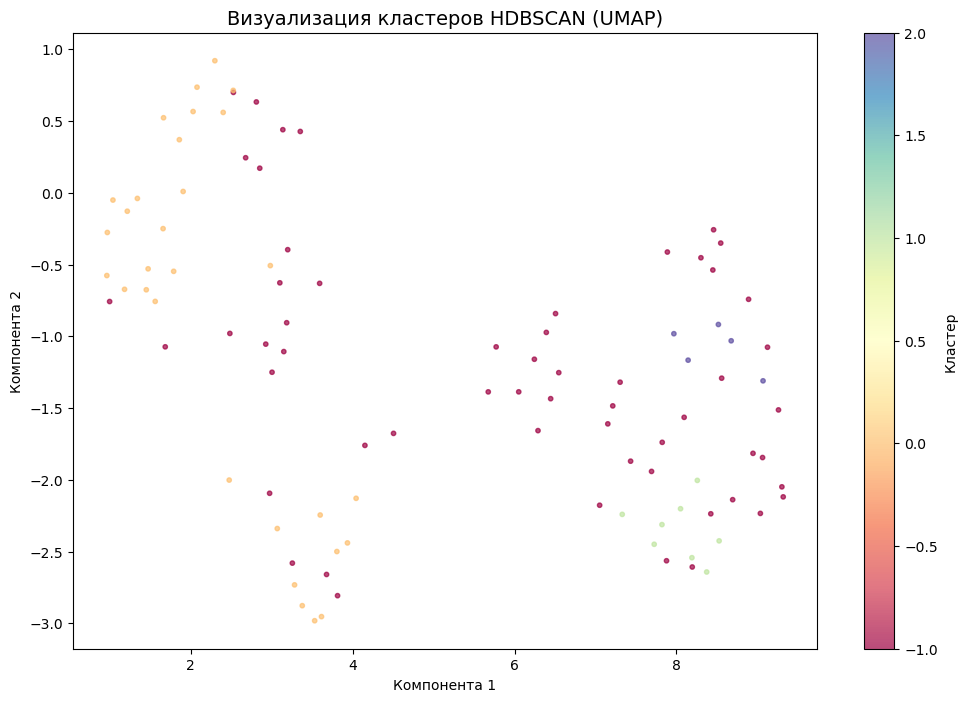

In [54]:
import matplotlib.pyplot as plt
from umap import UMAP

# Уменьшаем размерность эмбеддингов до 2D
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine')
reduced_embeddings = umap_model.fit_transform(embeddings)

# Создаем DataFrame для удобства
import pandas as pd
df_viz = pd.DataFrame({
    'x': reduced_embeddings[:, 0],
    'y': reduced_embeddings[:, 1],
    'cluster': labels  # labels из HDBSCAN
})

# Визуализация
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_viz['x'], 
    df_viz['y'], 
    c=df_viz['cluster'], 
    cmap='Spectral', 
    s=10,
    alpha=0.7
)
plt.colorbar(scatter, label='Кластер')
plt.title('Визуализация кластеров HDBSCAN (UMAP)', fontsize=14)
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.show()

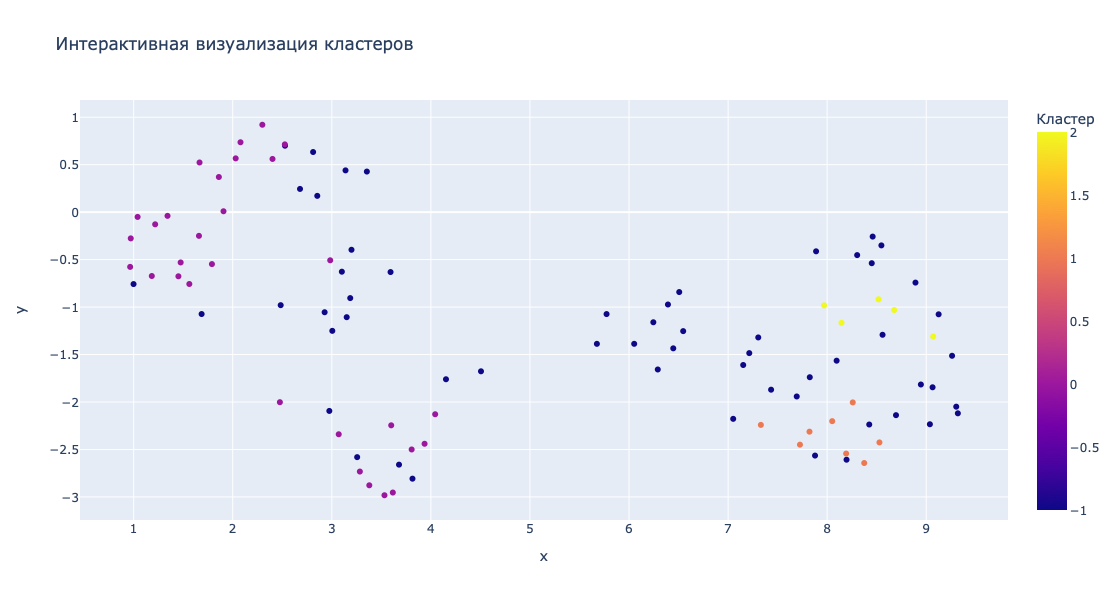

In [69]:
import plotly.express as px

# Добавляем тексты в DataFrame
df_viz['text'] = texts

# Интерактивный график
fig = px.scatter(
    df_viz,
    x='x',
    y='y',
    color='cluster',
    hover_data=['text'],  # Показываем текст при наведении
    title='Интерактивная визуализация кластеров',
    labels={'cluster': 'Кластер'},
    width=800,
    height=600
)
fig.show()

In [71]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Загрузка предобученной модели и токенизатора
model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

def generate_topic_name(keywords):
    prompt = f"Ключевые слова: {', '.join(keywords)}. Название темы: "
    inputs = tokenizer(prompt, return_tensors="pt")
    
    # Генерация текста
    outputs = model.generate(
        inputs["input_ids"],
        max_length=50,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    
    # Декодирование результата
    return tokenizer.decode(outputs[0], skip_special_tokens=True).replace(prompt, "").strip()

# Пример использования
for topic_id in topic_model.get_topic_info()['Topic']:
    if topic_id != -1:
        keywords = [word for word, _ in topic_model.get_topic(topic_id)]
        print(f"Тема {topic_id}: {generate_topic_name(keywords)}")

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

Тема 0: «Ключ к пониманию»

Введение
1. Понятие ключа к понятию ключа
Тема 1: &nbsp; &nbsp;&nbsp;.

В этом разделе вы можете найти много интересных и
